In [425]:
# Python for GIS - Geopandas (I)
# Our tutorial: https://gist.github.com/jorisvandenbossche/7b30ed43366a85af8626
#
# %matplotlib is a magic function in IPython. I'll quote the relevant documentation here for you to read for convenience:
# IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Lines magics can return results and can be used in the right hand side of an assignment. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.
# "%matplotlib inline" sets the backend of matplotlib to the 'inline' backend, so the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [426]:
%matplotlib inline

In [427]:
# import geopandas to work with geospatial data; conda install -c conda-forge geopandas

In [428]:
import geopandas

In [429]:
# import pandas to manipulate data

In [430]:
import pandas as pd

In [431]:
# To set display four rows

In [432]:
pd.options.display.max_rows = 4

In [433]:
# import matplotlib

In [434]:
from matplotlib import pyplot as plt

In [435]:
# Import earthpy to use for reprojecting data; conda install -c conda-forge earthpy see https://pypi.org/project/earthpy/

In [436]:
import earthpy as et 

In [437]:
# load downloaded shp data from SSI Server

In [438]:
data = geopandas.read_file("/Users/milo/Desktop/SSCI586/project3/beijing-latest-free.shp/gis_osm_landuse_a_free_1.shp")

In [439]:
print(len(data))

35046


In [440]:
# Identify the coordinate system
print(data.crs)

EPSG:4326


In [441]:
data = data.to_crs("EPSG:32650")

In [442]:
# Index starts at 0, no extra header row, no need for data.drop(0)

In [443]:
print(data.index)

RangeIndex(start=0, stop=35046, step=1)


In [444]:
# Show the first three rows

In [445]:
data.head(3)

,osm_id,code,fclass,name,geometry
0,9488290,7201,forest,湖心岛,"POLYGON ((447595.523 4420695.335, 447597.254 4..."
1,24476183,7202,park,建国门健身乐园,"POLYGON ((451046.931 4417640.624, 451047.402 4..."
2,24476204,7202,park,日坛公园,"POLYGON ((451711.225 4418602.806, 451724.315 4..."


In [446]:
# Calculate the area of each polygon:

In [447]:
data.geometry.area

0          1005.947882
1         15710.246119
             ...      
35044     31024.667062
35045    228693.722296
Length: 35046, dtype: float64

In [448]:
# Plot histogram of area values 

<Axes: >

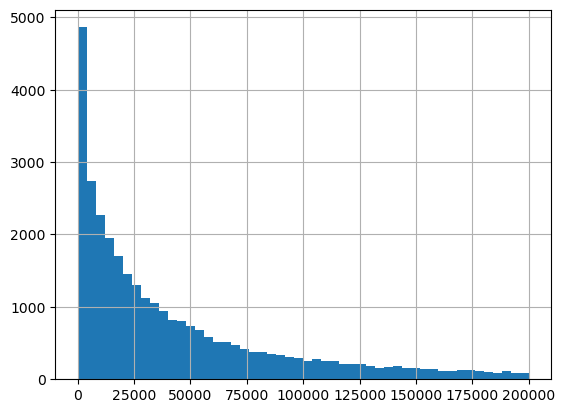

In [449]:
data.geometry.area.hist(bins=50, range=(0,0.2e6))

In [450]:
# Plot the shapes with coloring based on anohter column

In [451]:
# Extract the bounding box for each shape

In [452]:
bounds = data.bounds
bounds

,minx,miny,maxx,maxy
0,447595.523362,4.420675e+06,447631.543177,4.420711e+06
1,451046.931495,4.417641e+06,451165.270720,4.417780e+06
...,...,...,...,...
35044,386779.632576,4.420362e+06,387114.925398,4.420542e+06
35045,387111.626993,4.420303e+06,387778.462768,4.421088e+06


In [453]:
print(bounds.describe())

                minx          miny           maxx          maxy
count   35046.000000  3.504600e+04   35046.000000  3.504600e+04
mean   446074.834500  4.426936e+06  446433.983416  4.427281e+06
...              ...           ...            ...           ...
75%    461302.499426  4.446457e+06  461700.087480  4.446885e+06
max    541447.539468  4.541860e+06  544420.790975  4.545458e+06

[8 rows x 4 columns]


In [454]:
# filter data with extent, rounded range between the 50% (median) and 75% quantile.

In [455]:
data = data[
    (data.bounds['minx'] > 450000) & (data.bounds['minx'] < 470000) & 
    (data.bounds['maxx'] > 450000) & (data.bounds['maxx'] < 480000) &  
    (data.bounds['miny'] > 4420000) & (data.bounds['miny'] < 4440000) & 
    (data.bounds['maxy'] > 4430000) & (data.bounds['maxy'] < 4450000)   
]

In [456]:
print(len(data))

977


In [457]:
print(data.columns)

Index(['osm_id', 'code', 'fclass', 'name', 'geometry'], dtype='object')


In [458]:
# show unique values in fature class to see landuse types

In [459]:
print(data['fclass'].unique())

['park' 'residential' 'forest' 'retail' 'orchard' 'meadow' 'industrial'
 'grass' 'commercial' 'farmland' 'cemetery' 'scrub' 'quarry' 'farmyard'
 'vineyard' 'military']


In [460]:
# Import descartes to use for plotting polygons in geopandas
import descartes

In [461]:
import matplotlib.pyplot as plt

In [462]:
# Create a figure and plot data with colors based on the 'fclass' column

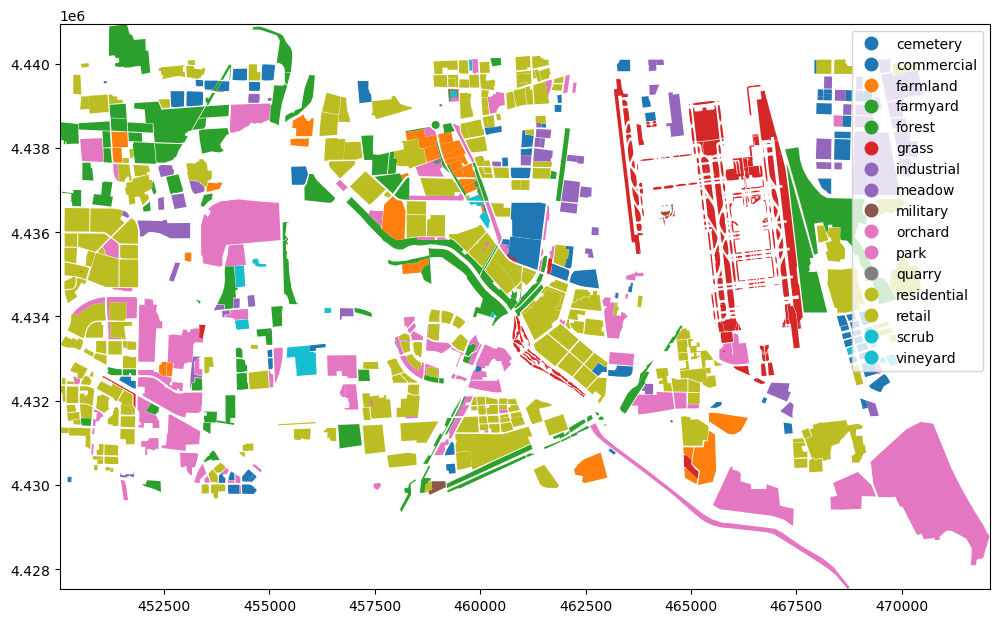

In [463]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'aspect': 'equal'})
data.plot(column='fclass', legend=True, ax=ax)  
ax.set_xlim(data.total_bounds[0], data.total_bounds[2])  # minx, maxx 
ax.set_ylim(data.total_bounds[1], data.total_bounds[3])  # miny, maxy 
plt.show()

In [464]:
# Select green urban areas 

In [465]:
green_areas = data[data['fclass']=='forest']

In [466]:
#Load street shapefile 

In [467]:
streets = geopandas.read_file("/Users/milo/Desktop/SSCI586/project3/beijing-latest-free.shp/gis_osm_roads_free_1.shp")

In [468]:
# Identify the coordinate system for streets data

In [469]:
print(streets.crs)

EPSG:4326


In [470]:
streets = streets.to_crs("EPSG:32650")
print(streets.crs)

EPSG:32650


In [471]:
# Create a figure to plot street in grey lines and forest areas in green

(4429351.144180983, 4440932.549147225)

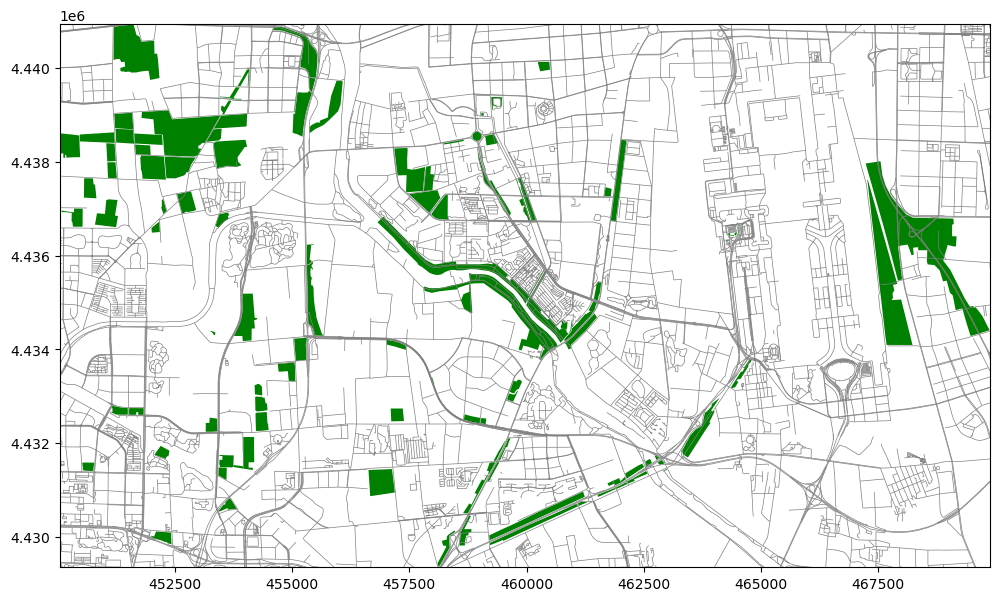

In [472]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
green_areas.plot(ax=ax, color='green')
# Set the plot extent to the bound of the green area
ax.set_xlim(green_areas.total_bounds[0], green_areas.total_bounds[2])
ax.set_ylim(green_areas.total_bounds[1], green_areas.total_bounds[3])

In [473]:
# create figure plot streets in green lines, buffer green areas by 300 meters and plot in light green

/Users/milo/anaconda3/envs/SSCI586_Spring2025_3921/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


(4429351.144180983, 4440932.549147225)

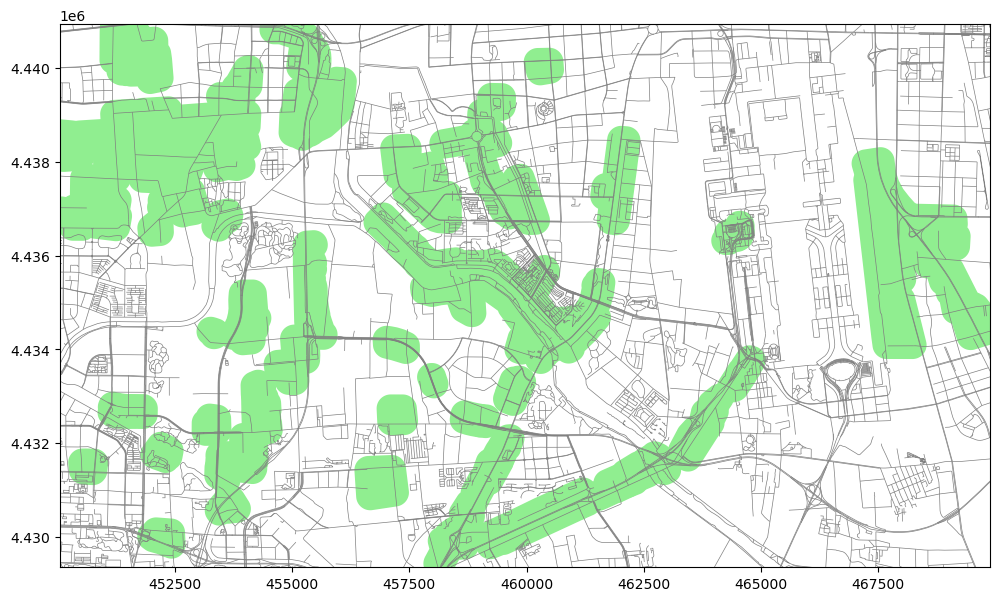

In [474]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
green_areas.geometry.buffer(300).plot(ax=ax, color='lightgreen')
ax.set_xlim(green_areas.total_bounds[0], green_areas.total_bounds[2])
ax.set_ylim(green_areas.total_bounds[1], green_areas.total_bounds[3])

In [475]:
# Load the Points of Interest shapefile

In [476]:
poi = geopandas.read_file("/Users/milo/Desktop/SSCI586/project3/beijing-latest-free.shp/gis_osm_pois_free_1.shp")

In [477]:
print(poi.crs)

EPSG:4326


In [478]:
poi = poi.to_crs("EPSG:32650")
print(poi.crs)

EPSG:32650


In [479]:
# view the spatial extent of all 3 layers 
print(data.total_bounds)
print(streets.total_bounds)
print(poi.total_bounds)

[ 450020.38386863 4427526.00772578  472088.04326984 4440932.54914722]
[ 362989.05501949 4364633.92352801  544540.38572728 4546456.09879437]
[ 365468.13183091 4373420.29543017  543015.93507693 4545283.58487578]


In [480]:
x = poi.geometry.apply(lambda p: p.x)
y = poi.geometry.apply(lambda p: p.y)
print(x,y)

0        448500.089092
1        452984.252119
             ...      
21271    447216.082622
21272    447223.204964
Name: geometry, Length: 21273, dtype: float64 0        4.421073e+06
1        4.420255e+06
             ...     
21271    4.428088e+06
21272    4.428180e+06
Name: geometry, Length: 21273, dtype: float64


In [481]:
# Set bounds for poi

In [482]:
poi = poi[(x < 450000) & (x > 445000) & (y < 4425000) & (y > 4420000)]

In [483]:
# plot poi data

(4420000.0, 4425000.0)

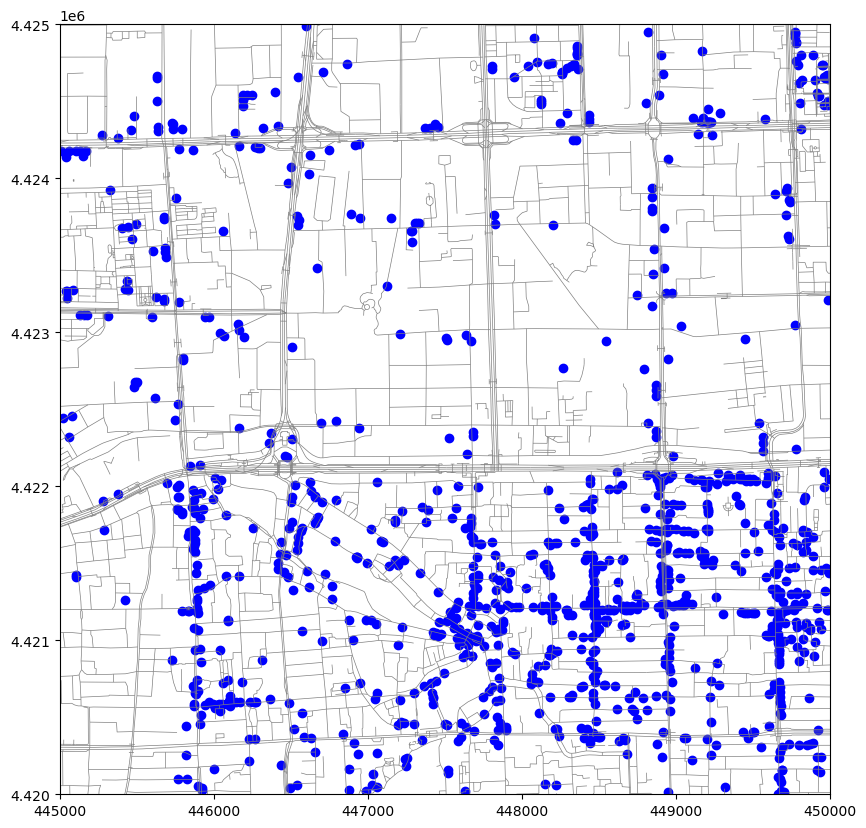

In [484]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
poi.plot(ax=ax, color='blue')
ax.set_xlim(445000, 450000)
ax.set_ylim(4420000, 4425000)

In [485]:
# Question: what is the distance to the nearest green area(forest) for all adresses?

In [486]:
urban_green = data[(data['fclass']=='forest') & (data.geometry.area > 10000)]

In [487]:
def urban_green_dist(point, urban_green):
    return urban_green.geometry.distance(point).min()

In [488]:
min_distance = poi.geometry.apply(lambda x: urban_green_dist(x, urban_green))

In [489]:
poi['min_distance'] = min_distance

/var/folders/h2/2qgzk4fd5blc5683b1zv2_vr0000gn/T/ipykernel_4239/619771552.py:3: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  poi.plot(ax=ax, column='min_distance', colormap='Greens_r')


(4420000.0, 4425000.0)

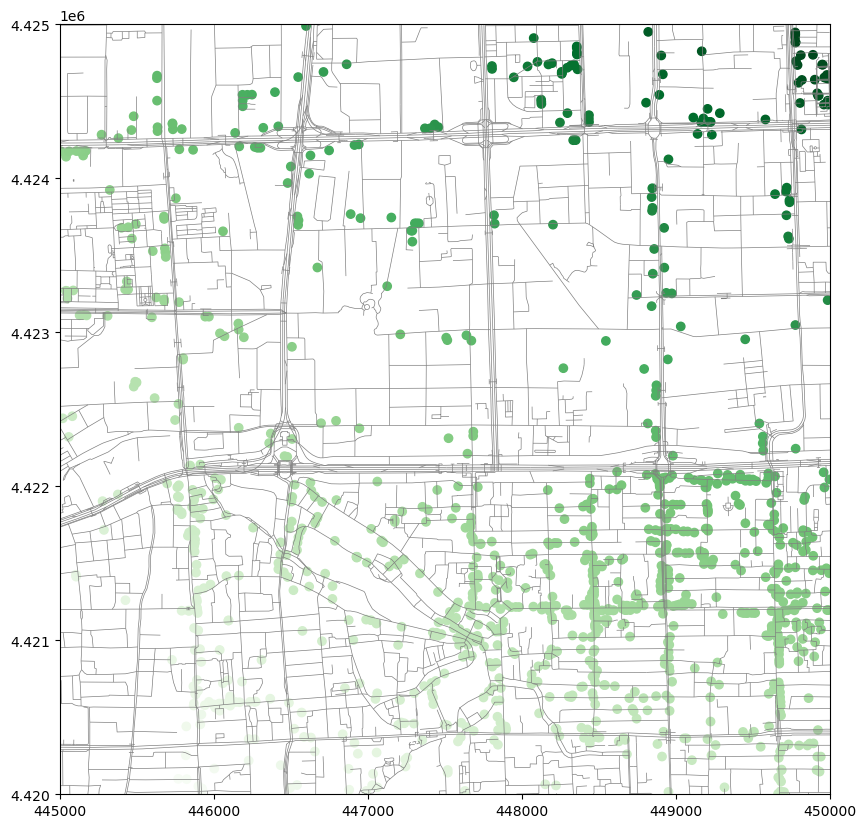

In [490]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
poi.plot(ax=ax, column='min_distance', colormap='Greens_r')
ax.set_xlim(445000, 450000)
ax.set_ylim(4420000, 4425000)

<Axes: >

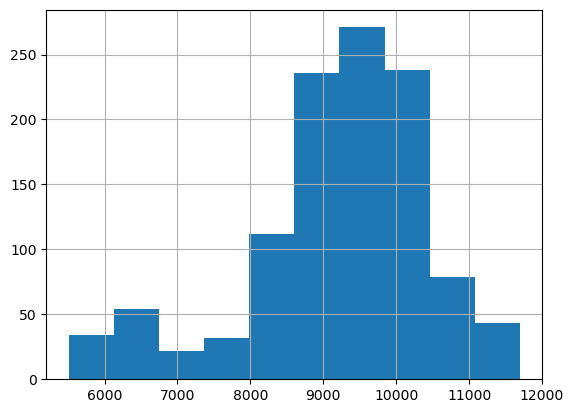

In [491]:
poi['min_distance'].hist()